# 올레거르멍: 사업화 데이터분석

## Contents
* Article: 쓰레기와 제주 관광, 플로깅에 대한 인식 조사
* Correlation: 쓰레기와 유동인구 간 상관관계 조사: "플로깅 스팟 추천 시스템"의 정당성 확보
* Forms: 플로깅 인식 설문조사

#### Article Analysis - 1. 오버 투어리즘
쓰레기가 제주 관광의 큰 문제로 인식되고 있음을 Word2Vec과 코사인 유사도 분석법을 통해 보이고, 이를 워드클라우드로 시각화한다

In [46]:
# 강준서 invalidid56@snu.ac.kr
# (1) 기사 분석 - a: 워드클라우드와 Cos-Sim 기법을 이용해 쓰레기가 제주 관광의 큰 문제임을 보인다
# (2) 기사 분석 - b: 워드클라우드와 Cos-Sim 기법을 이용해 플로깅에 대한 대중의 인식을 보인다


import pandas as pd
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

tagger = Okt()

In [47]:
stop_words = '등 것 이 말 명 전 그 고 위 때문 마련 저 라고'
stop_words = stop_words.split(' ')

네이버 뉴스에서 '오버 투어리즘' 키워드로 최근 기사를 크롤링하고, 이를 코퍼스로 정리하였다

In [48]:
kw = '관광 쓰레기'
corpus = list(pd.read_csv('NaverNews_{0}.csv'.format(kw))['content'].values)
corpus = [[word for word in tagger.nouns(line) if word not in stop_words] for line in corpus]
model = Word2Vec(corpus, min_count=1, workers=4)
model.wv.most_similar('쓰레기', topn=15)

[('관광객', 0.9942492842674255),
 ('제주', 0.9940369129180908),
 ('관광', 0.9928258061408997),
 ('수', 0.9926326274871826),
 ('며', 0.9923847913742065),
 ('주민', 0.992264449596405),
 ('지역', 0.9916648864746094),
 ('해수욕장', 0.9916271567344666),
 ('플라스틱', 0.9915676116943359),
 ('활동', 0.9914690852165222),
 ('기자', 0.9913046360015869),
 ('환경', 0.9912443161010742),
 ('사람', 0.9911424517631531),
 ('폐기물', 0.9911017417907715),
 ('해양', 0.9909960627555847)]

코사인 유사도 분석 결과, **쓰레기**와 유사한 맥락에서 등장하는 단어로 **관광객**과 **제주**, **해수욕장**, **폐기물** 등이 높게 나오는 것을 통해, 제주도의 관광 쓰레기 문제가 최근 대두되고 있음을 분석할 수 있다. 이를 워드 클라우드로 시각화한 결과는 아래와 같다.

In [49]:
word_list = sum(corpus, [])
counts = Counter(word_list)
tags = counts.most_common(40)

In [64]:
jeju_map = Image.open('jeju_gray.jpg')
img_array = np.array(jeju_map)

wc = WordCloud(background_color='Black', width=1300, height=650, scale=2.0, max_font_size=250,
               font_path='/home/invalidid56/MaruBuri-Light.otf', mask=img_array, colormap='PuBu')
cloud = wc.generate_from_frequencies(dict(tags))

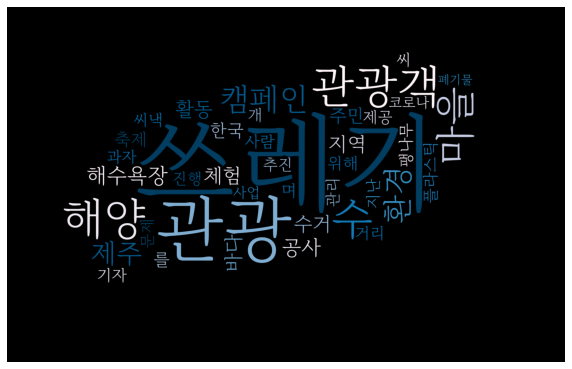

In [65]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


#### Article Analysis - 2. 플로깅 인식 조사

플로깅에 대한 인식을 있음을 Word2Vec과 코사인 유사도 분석법을 통해 분석하고, 이를 워드클라우드로 시각화한다

In [83]:
kw = '플로깅'
corpus = list(pd.read_csv('NaverNews_{0}.csv'.format(kw))['content'].values)
corpus = [[word for word in tagger.nouns(line) if word not in stop_words] for line in corpus]
model = Word2Vec(corpus, min_count=1, workers=4)
model.wv.most_similar('플로깅', topn=15)

[('깅', 0.9964519739151001),
 ('활동', 0.9962918162345886),
 ('수', 0.996275782585144),
 ('플로', 0.9961233735084534),
 ('코웨이', 0.9956540465354919),
 ('쓰레기', 0.9956452250480652),
 ('진행', 0.9955492615699768),
 ('지역', 0.9954082369804382),
 ('사회', 0.9952406287193298),
 ('및', 0.9951568841934204),
 ('키트', 0.9951075315475464),
 ('참여', 0.9949725866317749),
 ('캠페인', 0.9949524998664856),
 ('제공', 0.9948768615722656),
 ('친환경', 0.9947962760925293)]

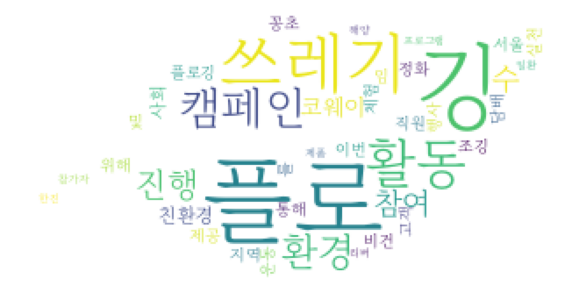

In [84]:
word_list = sum(corpus, [])
counts = Counter(word_list)
tags = counts.most_common(40)

leaf = Image.open('leaf.png')
img_array = np.array(leaf)

wc = WordCloud(background_color='White', font_path='/home/invalidid56/MaruBuri-Light.otf', mask=img_array)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

플로깅 기사 분석을 통해 얻을 수 있었던 인사이트~~~

#### Correlation. 쓰레기와 유동인구 간 상관관계 조사: "플로깅 스팟 추천 시스템"의 정당성 확보

본 서비스가 제공하는 플로깅 스팟 추천 시스템은 유동인구 밀집도 데이터를 기반으로 한다.
이는 관광객의 수가 쓰레기 배출량과 비례한다는 가설 하에 출발하는데, 이를 입증하기 위해 **제주특별자치도**에서 **2018년부터 2021년까지** 조사한 **클린하우스 배출량**과 **유동인구 매쉬업** 데이터를 활용하였다

In [94]:
file_list = ['2018', '2019', '2020', '2021']

temp = []
for file in file_list:
    temp.append(pd.read_csv(file+'.csv', encoding='euc-kr'))

df = pd.concat(temp)

In [95]:
df

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,선불금액,배출량,데이터기준일자
0,2018-01-01,서귀포시,남원읍,291408.897,18744.131,219588.857,529741.884,1.239600e+06,3.711000e+04,2020-12-15
1,2018-01-01,제주시,외도동,640502.991,31023.517,338078.366,1009604.874,6.498950e+06,1.943110e+05,2020-12-15
2,2018-01-01,제주시,한경면,129495.528,7366.742,78477.173,215339.443,3.940000e+04,1.178000e+03,2020-12-15
3,2018-01-01,제주시,화북동,1794267.754,72208.462,574606.887,2441083.104,9.231950e+06,2.759880e+05,2020-12-15
4,2018-01-01,서귀포시,동홍동,372744.391,26351.698,160768.257,559864.346,4.160200e+06,1.227090e+05,2020-12-15
...,...,...,...,...,...,...,...,...,...,...
6031,2021-05-31,서귀포시,예래동,943.000,31550.000,170606.530,77852.531,2.184774e+04,2.703068e+05,2021-07-26
6032,2021-05-31,제주시,봉개동,8455.000,282800.000,106598.799,98871.261,2.886362e+04,2.343337e+05,2021-07-26
6033,2021-05-31,제주시,이도2동,221097.000,7405450.000,521019.062,1180270.018,1.760340e+05,1.877323e+06,2021-07-26
6034,2021-05-31,서귀포시,대륜동,19536.000,653100.000,202607.776,338410.192,4.034091e+04,5.813589e+05,2021-07-26


이 데이터를 토대로 유동인구와 쓰레기 배출량 간의 관계를 아래와 같이 나타내었다

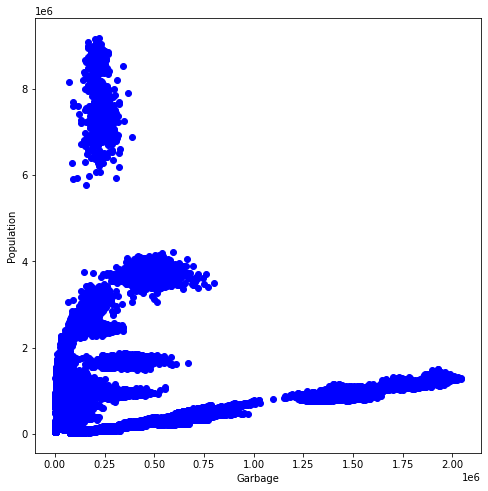

In [112]:
plt.figure(
 figsize=(8, 8)
)

plt.plot(
    df['배출량'],
    df['총 유동인구'],
    'bo'
)
plt.xlabel('Garbage')
plt.ylabel('Population')

plt.show()

In [111]:
np.corrcoef(df['배출량'], df['총 유동인구'])[0, 1]

0.08958703026300131

산점도와 상관계수를 분석하였을 때 일반적으로 유동인구와 배출량 간의 관계를 하나의 모델로 설명할 수 없다는 결론을 도출할 수 있었다.